# Business Problem- 
## Bob, the owner of a new mobile phone company wanted to strategically position his products to compete against established brands like Samsung and Apple. He collected sales data from various companies to focus on the critical features like RAM, internal memory and more to be able to achieve this. The main aim is to determine the best selling price of his mobile from using the data and predicting it. With this analysis Bob would be able to make proper data driven decisions and ensure the products are rightly priced and also meet consumer expectations. 

In [1]:
!pip install catboost
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D://IMI//Terms//Term 4//Analytics//Data Analytics & Machine Learning//Assignment//Arghya Sir//train.csv")

In [3]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


# Finding Missing Values

In [4]:
df.isna( ).sum( )

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.shape

(2000, 21)

# Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss=StandardScaler( )

In [9]:
df['battery_power']=ss.fit_transform(df[['battery_power']])
df['int_memory']=ss.fit_transform(df[['int_memory']])
df['mobile_wt']=ss.fit_transform(df[['mobile_wt']])
df['int_memory']=ss.fit_transform(df[['int_memory']])
df['px_height']=ss.fit_transform(df[['px_height']])
df['px_width']=ss.fit_transform(df[['px_width']])
df['ram']=ss.fit_transform(df[['ram']])

In [10]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,2.2,0,1,0,-1.380644,0.6,1.349249,2,...,-1.408949,-1.146784,0.391703,9,7,19,0,0,1,1
1,-0.495139,1,0.5,1,0,1,1.155024,0.7,-0.120059,3,...,0.585778,1.704465,0.467317,17,3,7,1,1,0,2
2,-1.537686,1,0.5,1,2,1,0.493546,0.9,0.134244,5,...,1.392684,1.074968,0.441498,11,2,9,1,1,0,2
3,-1.419319,1,2.5,0,0,0,-1.215274,0.8,-0.261339,6,...,1.286750,1.236971,0.594569,16,8,11,1,0,0,2
4,1.325906,1,1.2,0,13,1,0.658915,0.6,0.021220,2,...,1.268718,-0.091452,-0.657666,8,2,15,1,1,0,1
5,1.412405,0,0.5,1,3,0,-0.553795,0.7,0.671107,1,...,0.808917,0.931480,-0.974874,17,1,10,1,0,0,1
6,1.325906,0,1.7,0,4,1,-1.215274,0.8,-0.035292,8,...,-0.595280,-0.540431,1.010444,13,8,18,1,0,1,3
7,1.628654,0,0.5,1,0,0,-0.443549,0.8,1.320993,4,...,-0.300016,-0.237254,-1.313291,16,3,5,1,1,1,0
8,0.470015,1,0.5,0,0,0,1.155024,0.7,0.953666,7,...,-0.584011,-0.961638,-0.945367,17,1,20,1,0,0,0
9,-1.660607,1,0.6,1,2,1,-1.270397,0.1,-1.335064,5,...,1.108689,-0.063680,-1.485727,19,10,12,1,0,0,0


In [11]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Training and Testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']]
y=df['price_range']

In [14]:
X_Train,X_Test, Y_Train,Y_Test= train_test_split(x,y,test_size=0.3)

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [16]:
dt=dtree( )

In [17]:
dt.fit(X_Train,Y_Train)

DecisionTreeClassifier()

In [18]:
Y_Pred1 = dt.predict(X_Test)

# Calculating Performance for Decision Tree

In [19]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [20]:
accuracy_score(Y_Test,Y_Pred1)

0.8283333333333334

In [21]:
precision_score(Y_Test, Y_Pred1, average='micro')

0.8283333333333334

In [22]:
recall_score(Y_Test, Y_Pred1, average='micro')

0.8283333333333334

In [23]:
f1_score(Y_Test, Y_Pred1, average='micro')

0.8283333333333334

# Feature Importance

In [24]:
feature_imp = pd.Series(dt.feature_importances_,index=X_Train.columns).sort_values(ascending=False)
feature_imp

ram              0.609966
battery_power    0.142553
px_height        0.098396
px_width         0.071624
int_memory       0.014962
mobile_wt        0.014540
clock_speed      0.008212
pc               0.007852
n_cores          0.006456
m_dep            0.004239
sc_h             0.004128
fc               0.003959
sc_w             0.003747
touch_screen     0.003334
talk_time        0.003067
four_g           0.002223
dual_sim         0.000741
blue             0.000000
three_g          0.000000
wifi             0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


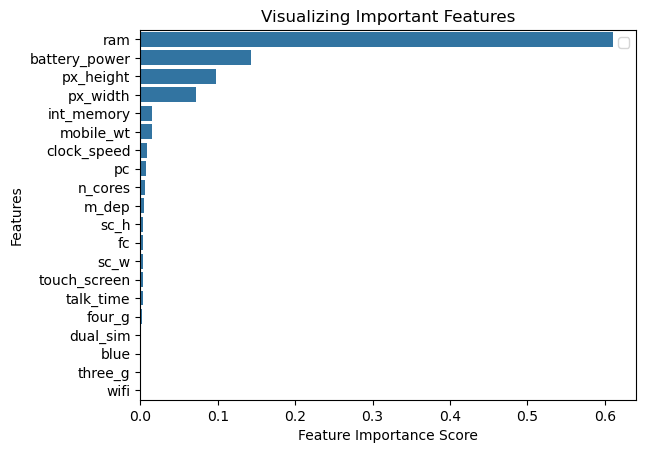

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Decision Tree upto depth of 3

[Text(0.5, 0.875, 'node #0\nram <= 0.159\ngini = 0.75\nsamples = 1400\nvalue = [350.0, 353.0, 361.0, 336.0]\nclass = 2'),
 Text(0.25, 0.625, 'node #1\nram <= -0.988\ngini = 0.599\nsamples = 765\nvalue = [350.0, 323.0, 90.0, 2.0]\nclass = 0'),
 Text(0.125, 0.375, 'node #2\npx_height <= 1.812\ngini = 0.182\nsamples = 297\nvalue = [267, 30, 0, 0]\nclass = 0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #37\nram <= -0.568\ngini = 0.54\nsamples = 468\nvalue = [83, 293, 90, 2]\nclass = 1'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #148\nram <= 0.904\ngini = 0.539\nsamples = 635\nvalue = [0, 30, 271, 334]\nclass = 3'),
 Text(0.625, 0.375, 'node #149\nbattery_power <= 0.961\ngini = 0.442\nsamples = 314\nvalue = [0.0, 30.0, 225.0, 59.0]\nclass = 2'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'node #236\nbattery_power <

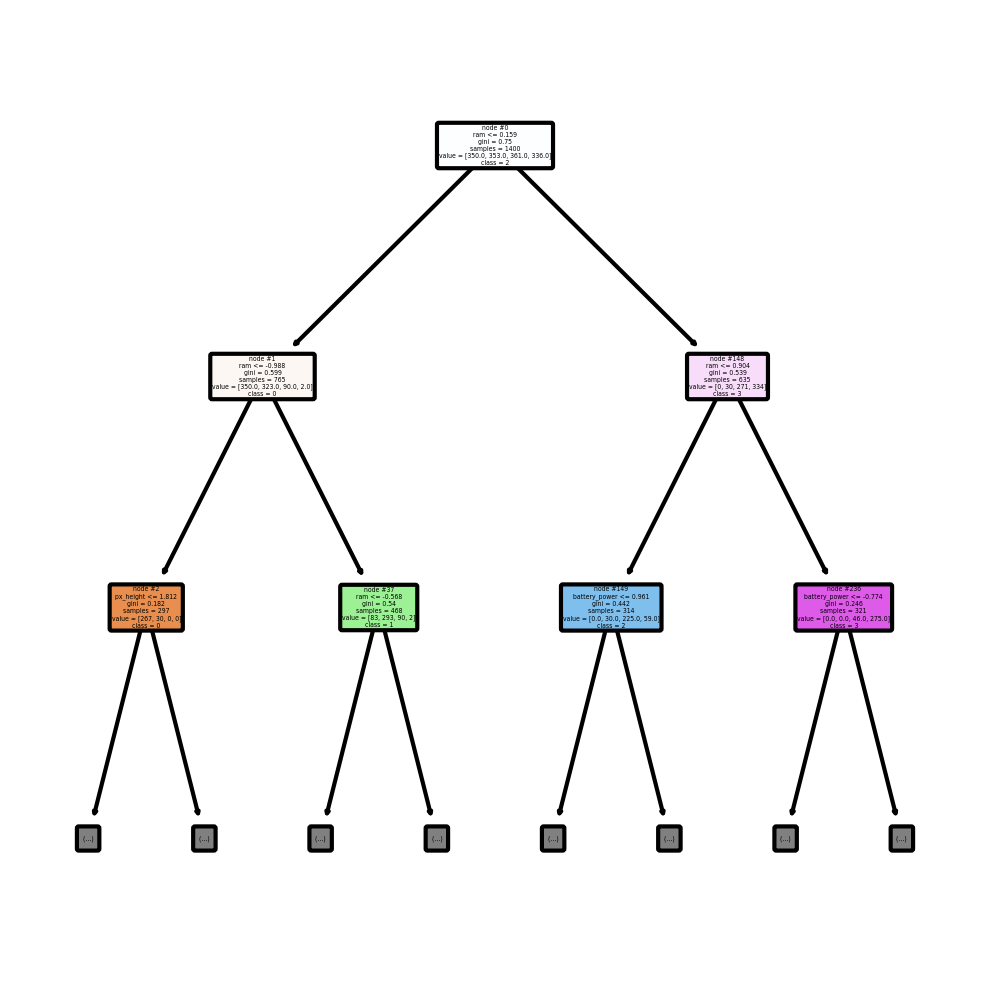

In [26]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols= 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dt, max_depth= 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi', 'price_range'],
            class_names = ["0","1","2","3"]
              )

# CatBoost

In [27]:
from catboost import CatBoostClassifier

In [28]:
cat = CatBoostClassifier()

In [29]:
cat.fit(X_Train,Y_Train)

Learning rate set to 0.080496
0:	learn: 1.2767843	total: 164ms	remaining: 2m 44s
1:	learn: 1.1820386	total: 175ms	remaining: 1m 27s
2:	learn: 1.1131806	total: 185ms	remaining: 1m 1s
3:	learn: 1.0390179	total: 194ms	remaining: 48.3s
4:	learn: 0.9844615	total: 203ms	remaining: 40.4s
5:	learn: 0.9231876	total: 213ms	remaining: 35.4s
6:	learn: 0.8838716	total: 222ms	remaining: 31.4s
7:	learn: 0.8412183	total: 237ms	remaining: 29.4s
8:	learn: 0.7968000	total: 247ms	remaining: 27.2s
9:	learn: 0.7668502	total: 255ms	remaining: 25.3s
10:	learn: 0.7262411	total: 267ms	remaining: 24s
11:	learn: 0.6951887	total: 276ms	remaining: 22.7s
12:	learn: 0.6729386	total: 284ms	remaining: 21.6s
13:	learn: 0.6473898	total: 294ms	remaining: 20.7s
14:	learn: 0.6216571	total: 301ms	remaining: 19.8s
15:	learn: 0.6032557	total: 310ms	remaining: 19.1s
16:	learn: 0.5875826	total: 318ms	remaining: 18.4s
17:	learn: 0.5701916	total: 328ms	remaining: 17.9s
18:	learn: 0.5514870	total: 337ms	remaining: 17.4s
19:	learn: 

In [30]:
Y_Pred2 = cat.predict(X_Test)

# Calculating Performance for CatBoost

In [31]:
accuracy_score(Y_Test,Y_Pred2)

0.9466666666666667

In [32]:
precision_score(Y_Test, Y_Pred2, average='micro')

0.9466666666666667

In [33]:
recall_score(Y_Test, Y_Pred2, average='micro')

0.9466666666666667

In [34]:
f1_score(Y_Test, Y_Pred1, average='micro')

0.8283333333333334

# Testing on New Data

In [35]:
new_test_data=pd.read_csv("D://IMI//Terms//Term 4//Analytics//Data Analytics & Machine Learning//Assignment//Arghya Sir//test.csv")

In [36]:
new_test_data.drop(['id'], axis=1, inplace=True)

In [37]:
new_test_data['battery_power']=ss.fit_transform(new_test_data[['battery_power']])
new_test_data['int_memory']=ss.fit_transform(new_test_data[['int_memory']])
new_test_data['mobile_wt']=ss.fit_transform(new_test_data[['mobile_wt']])
new_test_data['int_memory']=ss.fit_transform(new_test_data[['int_memory']])
new_test_data['px_height']=ss.fit_transform(new_test_data[['px_height']])
new_test_data['px_width']=ss.fit_transform(new_test_data[['px_width']])
new_test_data['ram']=ss.fit_transform(new_test_data[['ram']])

In [38]:
dt.predict(new_test_data)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 0, 1, 2, 0, 0,
       0, 1, 1, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 2, 2, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 2, 2, 0, 2,
       1, 0, 3, 0, 2, 0, 3, 2, 1, 3, 1, 2, 3, 3, 3, 2, 2, 3, 3, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 1, 2, 2,
       2, 3, 1, 1, 2, 3, 3, 2, 1, 0, 0, 0, 1, 2, 0, 2, 3, 3, 1, 2, 0, 3,
       2, 3, 3, 1, 0, 0, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 2, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 2, 2, 1, 3, 3, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       2, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [39]:
print("accuracy_score_for_Decision_tree:", accuracy_score(Y_Test, Y_Pred1))
print("precision_score_for_Decision_tree:", precision_score(Y_Test, Y_Pred1, average='macro'))
print("recall_score_for_Decision_tree:", recall_score(Y_Test, Y_Pred1, average='macro'))
print("f1_score_for_Decision_tree:", f1_score(Y_Test, Y_Pred1, average='macro'))

accuracy_score_for_Decision_tree: 0.8283333333333334
precision_score_for_Decision_tree: 0.8239664393670251
recall_score_for_Decision_tree: 0.8245051703783811
f1_score_for_Decision_tree: 0.8241493159674836


In [40]:
print("accuracy_score_for_XBoost:", accuracy_score(Y_Test, Y_Pred2))
print("precision_score_for_XBoost:", precision_score(Y_Test, Y_Pred2, average='macro'))
print("recall_score_for_XBoost:", recall_score(Y_Test, Y_Pred2, average='macro'))
print("f1_score_for_XBoost:", f1_score(Y_Test, Y_Pred2, average='macro'))

accuracy_score_for_XBoost: 0.9466666666666667
precision_score_for_XBoost: 0.9455209441609947
recall_score_for_XBoost: 0.9458272306992633
f1_score_for_XBoost: 0.9456360882863635


# Comparing the performance of the Algorithms

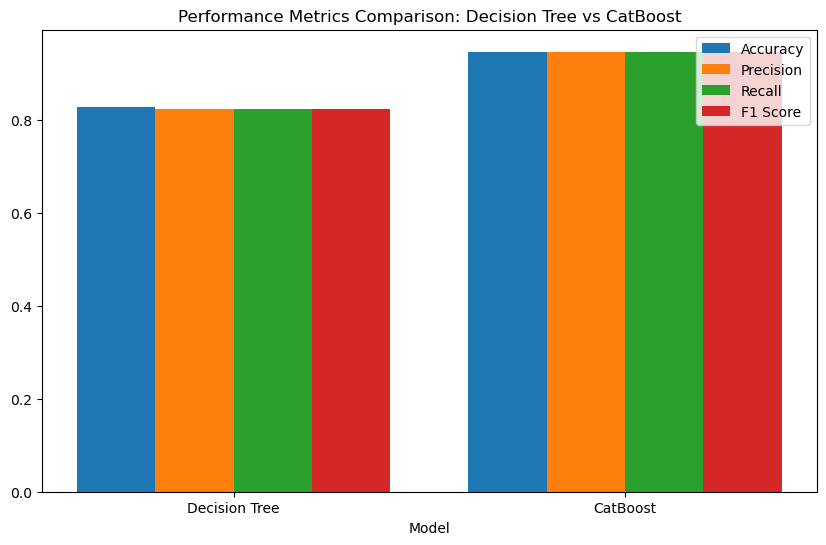

In [42]:
# Preparing data for the comparison bar graph

models = ['Decision Tree', 'CatBoost']
accuracy = [accuracy_score(Y_Test, Y_Pred1), accuracy_score(Y_Test, Y_Pred2)]
precision = [precision_score(Y_Test, Y_Pred1, average='macro'), precision_score(Y_Test, Y_Pred2, average='macro')]
recall = [recall_score(Y_Test, Y_Pred1, average='macro'), recall_score(Y_Test, Y_Pred2, average='macro')]
f1 = [f1_score(Y_Test, Y_Pred1, average='macro'), f1_score(Y_Test, Y_Pred2, average='macro')]

# Setting up the bar width and positions
bar_width = 0.2
x = np.arange(len(models))

# Plotting the bar graphs
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
ax.bar(x - 1.5 * bar_width, accuracy, bar_width, label='Accuracy')
ax.bar(x - 0.5 * bar_width, precision, bar_width, label='Precision')
ax.bar(x + 0.5 * bar_width, recall, bar_width, label='Recall')
ax.bar(x + 1.5 * bar_width, f1, bar_width, label='F1 Score')

# Adding labels and titles
ax.set_xlabel('Model')
ax.set_title('Performance Metrics Comparison: Decision Tree vs CatBoost')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()